In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.ensemble import BaggingClassifier, StackingClassifier
from sklearn.svm import SVR, SVC
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve, auc, roc_auc_score
import lightgbm as lgb
import warnings
warnings.filterwarnings('ignore') # Suppress all warnings to clean up output
np.random.seed(42) # Fixes randomness in NumPy operations for reproducible results
import IPython
from IPython import display

# Task 01: Data Preprocessing and Early Data Analysis (EDA)

## Load Dataset

In [2]:
# Load raw dataset
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep=r"\s+", skiprows=22, header=None) # pd.read_csv: Loads tabular data
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]]) # np.hstack: Horizontally stacks arrays
target = raw_df.values[1::2, 2]
combined_data = np.column_stack([data, target]) # np.column_stack: Combines arrays column-wise

# Define column names
column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE','DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']

# Create DataFrame with all columns
boston = pd.DataFrame(combined_data, columns=column_names) # pd.DataFrame: Creates structured table from array
IPython.display.display(boston.head(10))

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,386.71,17.10,18.9


In [3]:
print('Shape before deleting duplicate values:', boston.shape) # .shape: Returns the (rows, columns) of the DataFrame
boston=boston.drop_duplicates() # .drop_duplicates(): Removes duplicate rows (if any) from the DataFrame
print('Shape After deleting duplicate values:', boston.shape)

Shape before deleting duplicate values: (506, 14)
Shape After deleting duplicate values: (506, 14)


## Missing Value Handling

In [4]:
boston.info() # info(): Shows data types, non-null counts, and structure

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [5]:
boston.isnull().sum() 
# .isnull(): Checks for missing (NaN) values  
# .sum(): Counts total missing values per column

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [6]:
IPython.display.display(boston.describe()) # .describe(): Summary stats for numeric columns

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [7]:
boston.nunique() # .nunique(): Counts unique values per column

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
MEDV       229
dtype: int64

# Visualization of key features

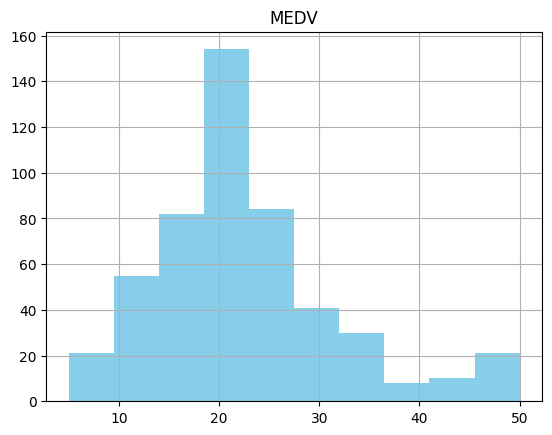

In [8]:
# Target Variable 'MEDV' Histrogram
boston.hist(['MEDV'],color='skyblue') # Plots histogram for specified column
plt.show() # Displays the plot

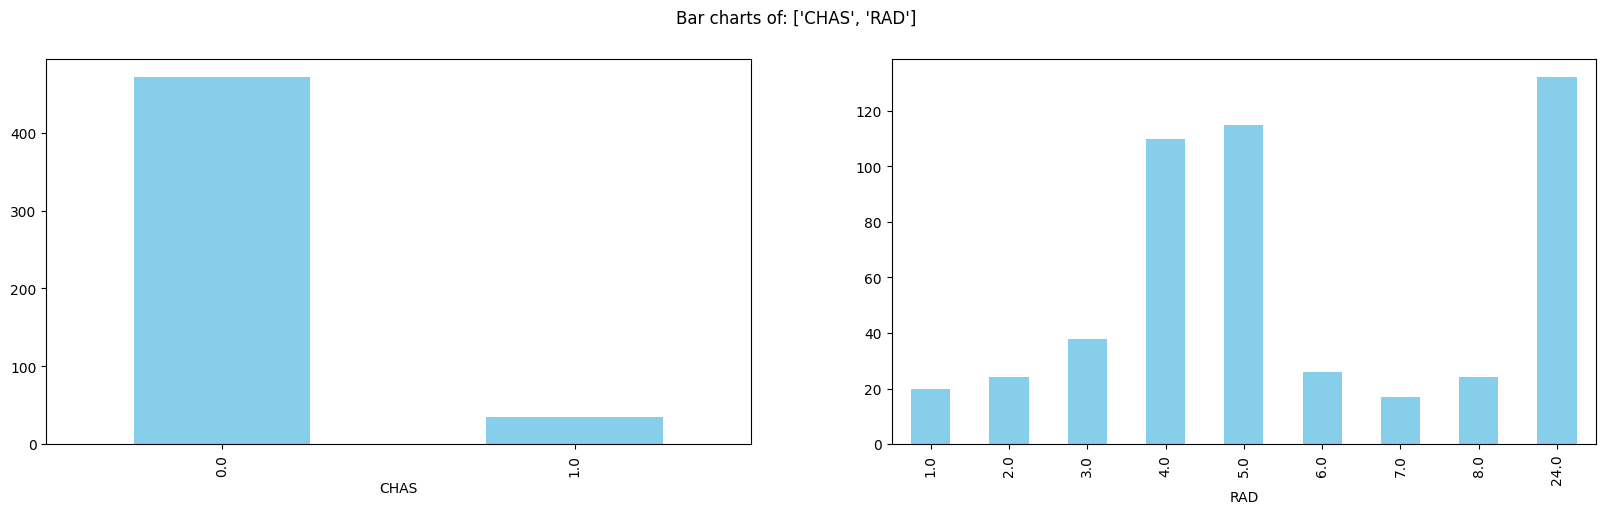

In [11]:
# Barplots for Categorical Data (Discrete)
def PlotBarCharts(inpData, colsToPlot):
    # Generating multiple subplots
    fig, subPlot=plt.subplots(nrows=1, ncols=len(colsToPlot), figsize=(20,5))
    fig.suptitle('Bar charts of: '+ str(colsToPlot))

    for colName, plotNumber in zip(colsToPlot, range(len(colsToPlot))):
        inpData.groupby(colName).size().plot(kind='bar',ax=subPlot[plotNumber], color="skyblue")

PlotBarCharts(inpData=boston, colsToPlot=['CHAS','RAD'])

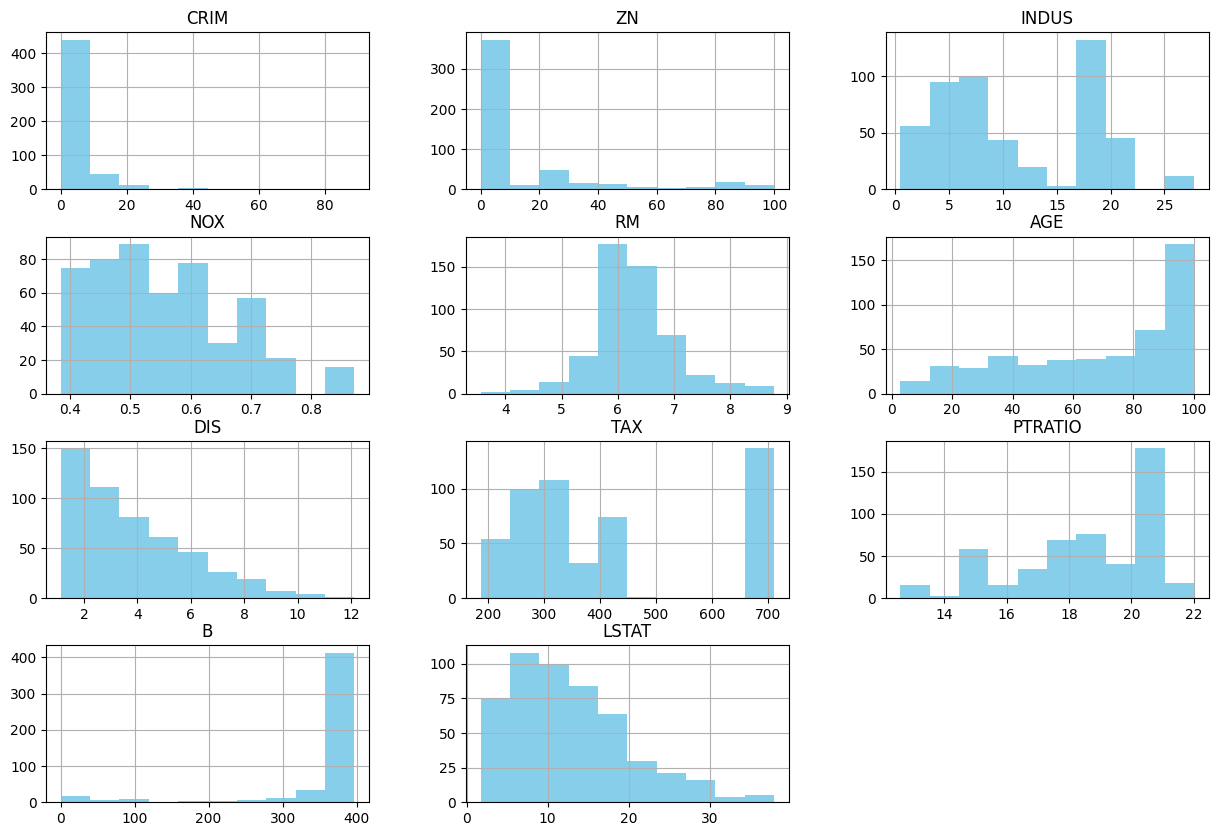

In [12]:
# Plotting histograms of multiple columns together
boston.hist(['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX','PTRATIO', 'B', 'LSTAT'], figsize=(15,10), color="skyblue")
plt.show()

<Axes: >

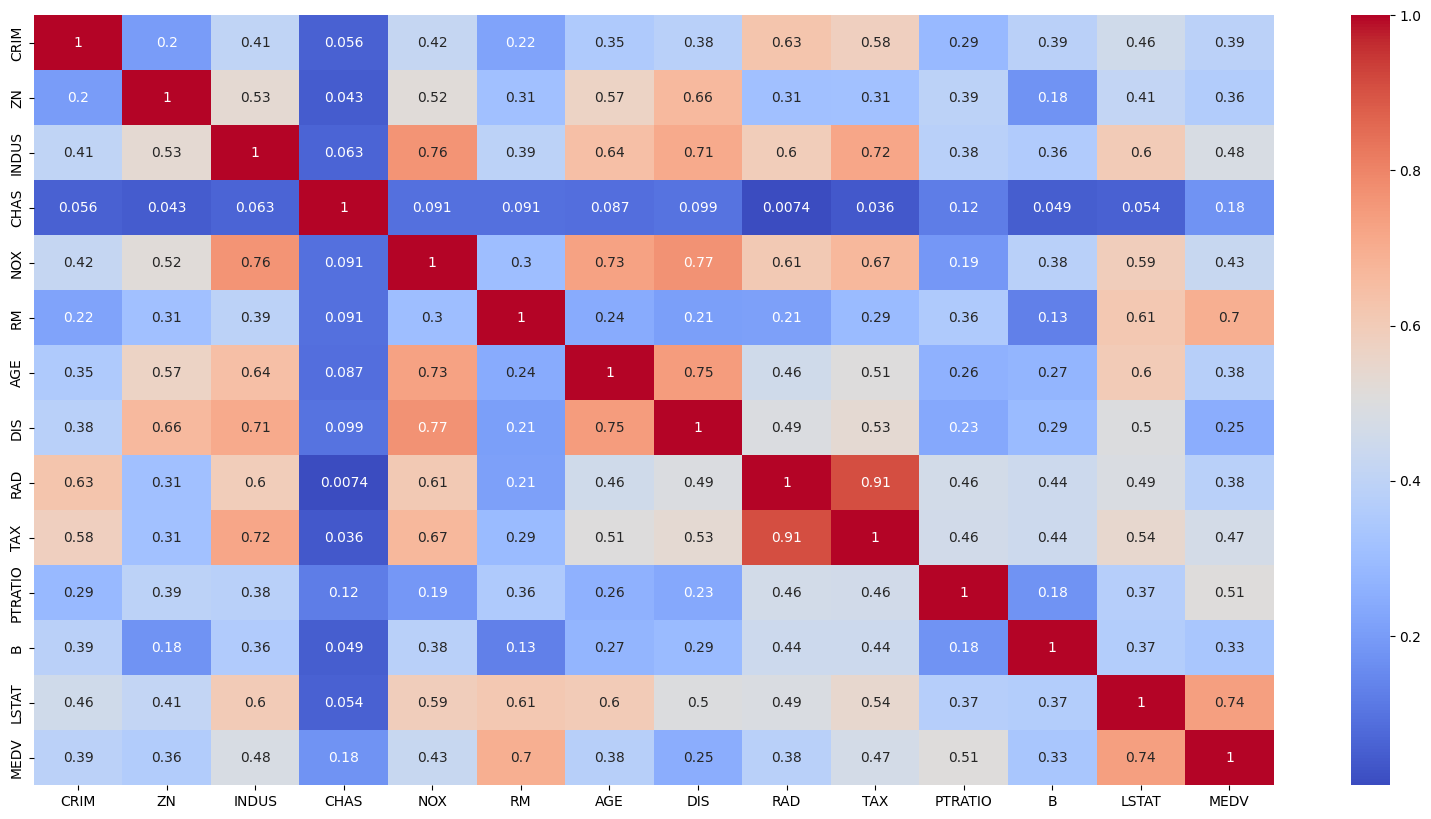

In [13]:
plt.figure(figsize=(20, 10)) # Sets the figure size 
sns.heatmap(boston.corr().abs(), annot=True, cmap='coolwarm')   
# boston.corr(): Computes correlation matrix  
# .abs(): Takes absolute value of correlations  
# sns.heatmap(): Plots heatmap of correlations

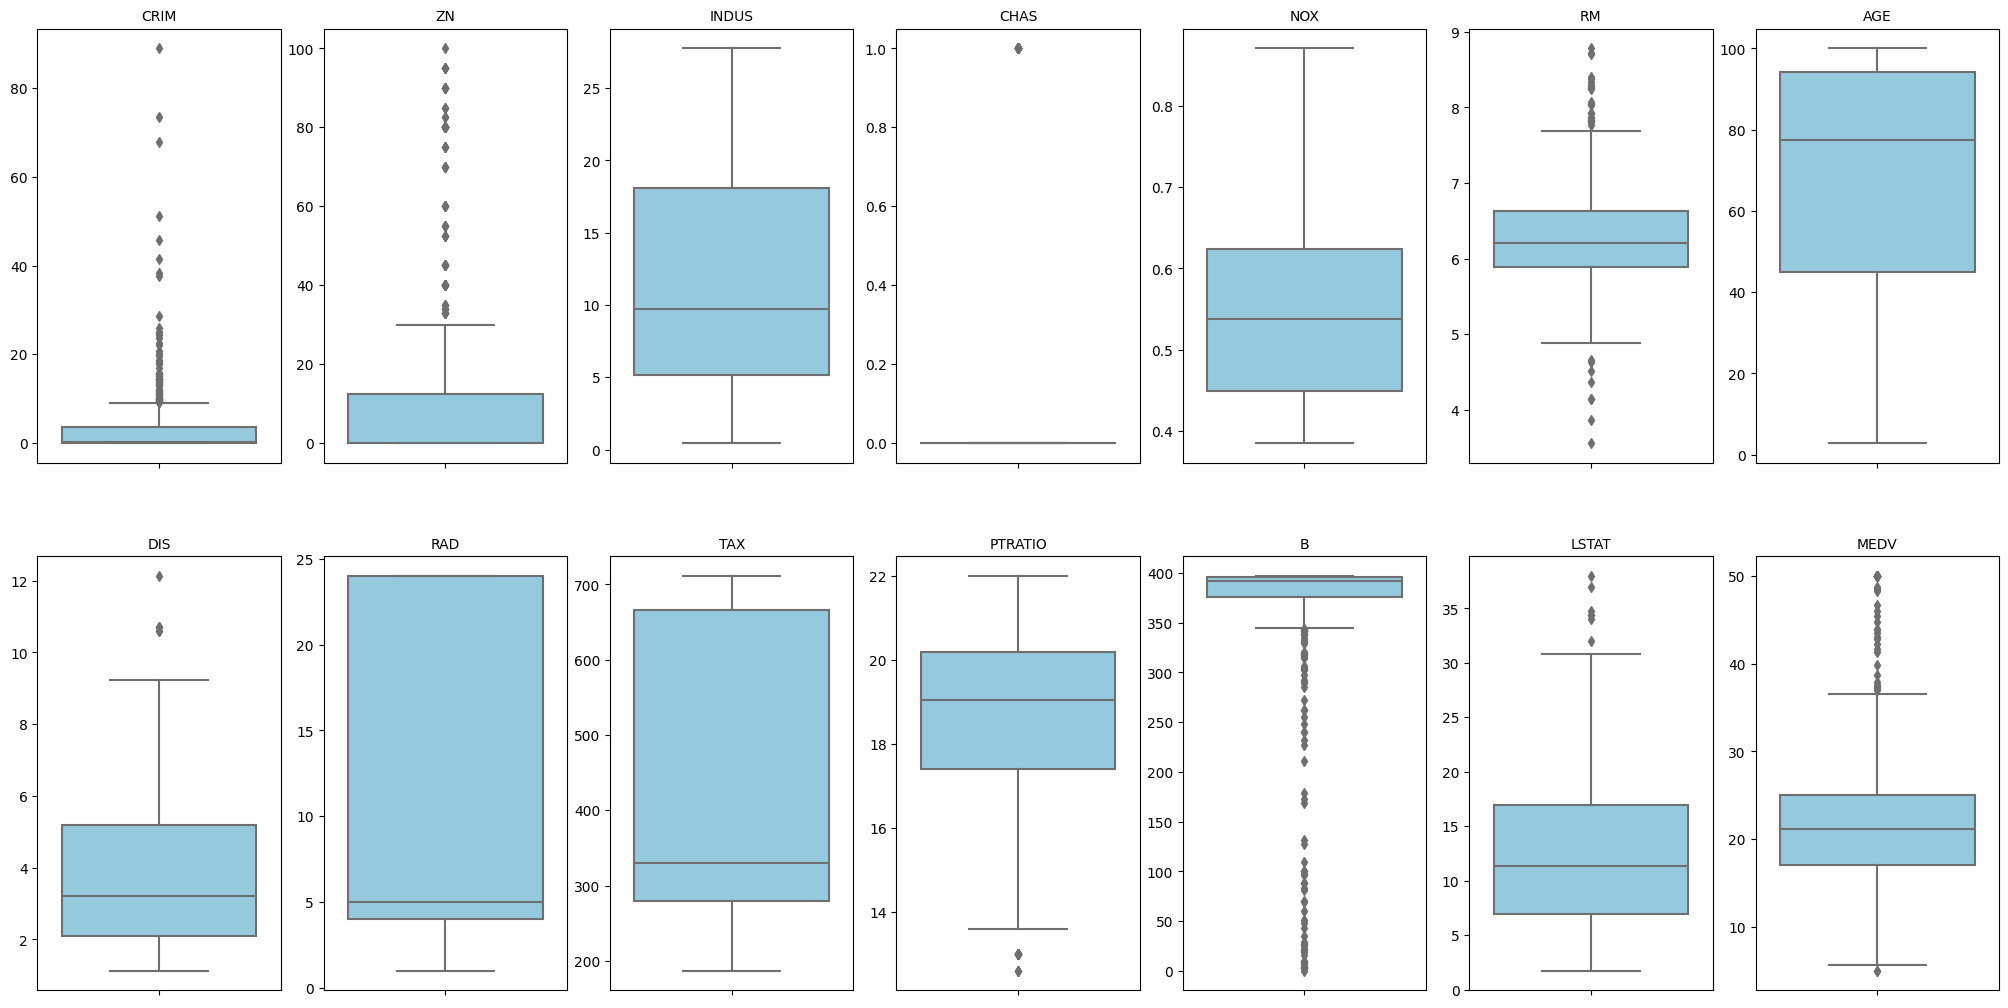

In [14]:
# Create subplots (7 columns, 2 rows)
fig, axs = plt.subplots(ncols=7, nrows=2, figsize=(20, 10))
axs = axs.flatten()  # Flatten to 1D array for easy iteration

# Plot boxplot for each feature
for i, column in enumerate(boston.columns):
    if i < len(axs):  # Ensure we don't exceed number of subplots
        sns.boxplot(y=boston[column], ax=axs[i], color='skyblue')
        axs[i].set_title(column, fontsize=10)  # Add column name as title
        axs[i].set_ylabel('')  # Remove y-axis label to save space

# Remove any empty subplots if we have fewer features than subplots
for j in range(i+1, len(axs)):
    fig.delaxes(axs[j])

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)
plt.show()

In [15]:
# Separate features and target
X = boston.drop('MEDV', axis=1) # Drops target column 'MEDV' from DataFrame to get features
y = boston['MEDV'] # Selects 'MEDV' column as target variable

print("X",X.shape)
print("y",y.shape)

X (506, 13)
y (506,)


In [16]:
for k, v in boston.items():
        q1 = v.quantile(0.25)
        q3 = v.quantile(0.75)
        iqr = q3 - q1
        v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
        perc = np.shape(v_col)[0] * 100.0 / np.shape(data)[0]
        print("Column %s outliers = %.2f%%" % (k, perc))

Column CRIM outliers = 13.04%
Column ZN outliers = 13.44%
Column INDUS outliers = 0.00%
Column CHAS outliers = 100.00%
Column NOX outliers = 0.00%
Column RM outliers = 5.93%
Column AGE outliers = 0.00%
Column DIS outliers = 0.99%
Column RAD outliers = 0.00%
Column TAX outliers = 0.00%
Column PTRATIO outliers = 2.96%
Column B outliers = 15.22%
Column LSTAT outliers = 1.38%
Column MEDV outliers = 7.91%


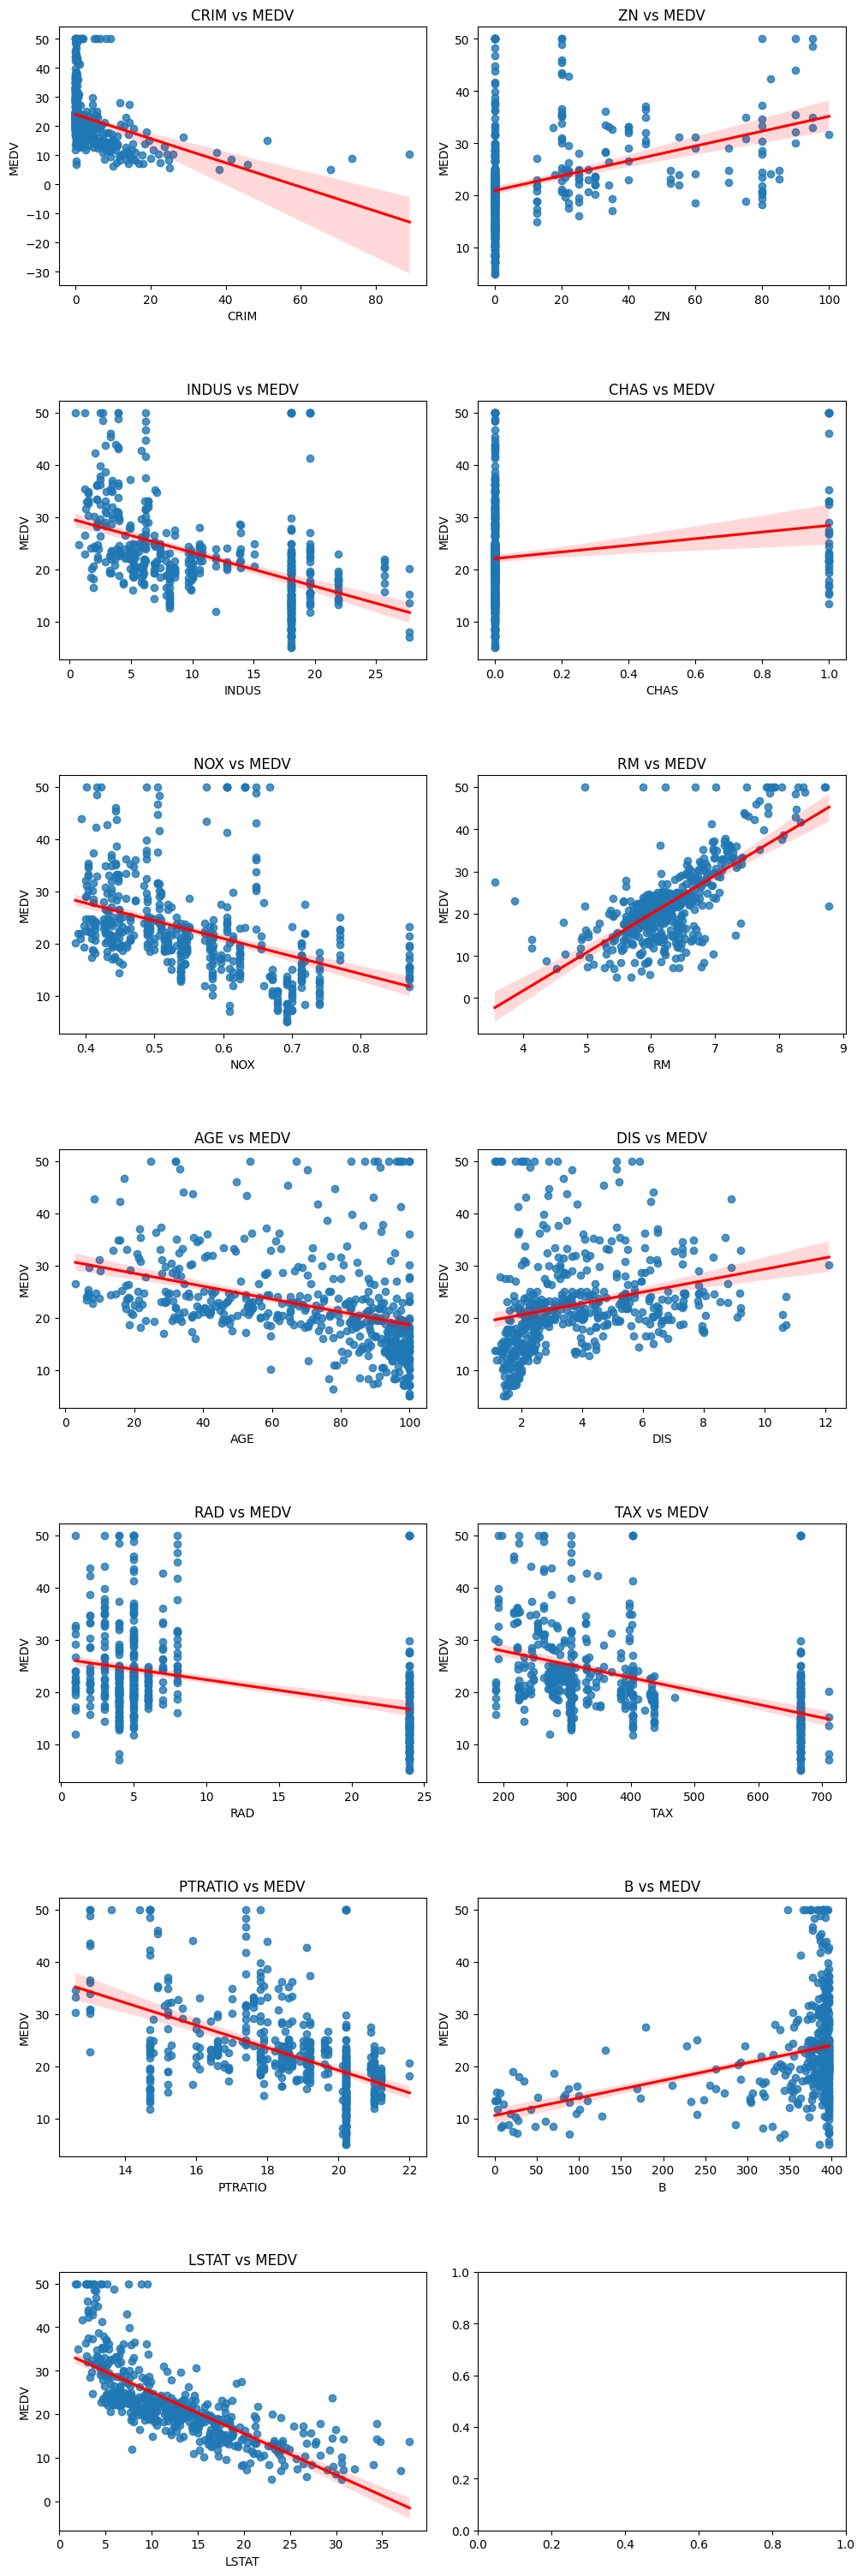

In [20]:
fig, axs = plt.subplots(ncols=2, nrows=7, figsize=(10, 30))  # Creates a grid with specified figure size
axs = axs.flatten()  # Flattens 2D array of axes into 1D for easy iteration

for i, feature in enumerate(X):  
    
    sns.regplot(y=y, x=X[feature], ax=axs[i], line_kws={"color": "red"})  # Plots scatter + regression line between feature and target
    axs[i].set_title(f'{feature} vs MEDV')  # Sets subplot title
    axs[i].set_xlabel(feature)  # Sets x-axis label

plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)  # Adjusts subplot spacing to prevent overlap
plt.show()  # Displays the plots

## Feature Scaling

In [17]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features
scaler = preprocessing.StandardScaler() # StandardScaler: Scales features using Standard Normal Distribution
X_train_scaled = scaler.fit_transform(X_train) #  Learns scaling parameters from training data and applies scaling
X_test_scaled = scaler.transform(X_test) # Applies the same scaling to test data (without refitting)

# Task 02: Train and Evaluate Regression Models

## Train Linear Regression, Decision Tree, Random Forest, and Support Vector Machine models.

In [18]:
# Initialize models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Support Vector Machine': SVR()
}

# Train models
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    print(f"{name} trained")

Linear Regression trained
Decision Tree trained
Random Forest trained
Support Vector Machine trained


## Compare performance using Mean Squared Error (MSE), Mean Absolute Error (MAE) and R² Score.

In [19]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

results = []

for name, model in models.items():
    # Make predictions
    y_pred = model.predict(X_test_scaled)
    
    # Calculate metrics
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store results
    results.append({
        'Model': name,
        'MSE': mse,
        'MAE': mae,
        'R2 Score': r2
    })

# Convert results to DataFrame
results_df = pd.DataFrame(results)
print(results_df.sort_values(by='R2 Score', ascending=False))

                    Model        MSE       MAE  R2 Score
2           Random Forest   7.912745  2.041078  0.892100
1           Decision Tree  10.416078  2.394118  0.857963
0       Linear Regression  24.291119  3.189092  0.668759
3  Support Vector Machine  25.668540  2.731716  0.649977


## Tune hyperparameters using GridSearchCV

In [20]:
# Parameter grids

# Random Forest
rf_params = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}

# SVM
svm_params = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf'],
    'gamma': ['scale', 'auto', 0.1, 1]
}

# Decision Tree
dt_params = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# GridSearchCV Initialization

rf_grid = GridSearchCV(
    RandomForestRegressor(random_state=42),
    param_grid=rf_params,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

svm_grid = GridSearchCV(
    SVR(),
    param_grid=svm_params,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)

dt_grid = GridSearchCV(
    DecisionTreeRegressor(random_state=42),
    param_grid=dt_params,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1
)


# Fit Models
rf_grid.fit(X_train_scaled, y_train)
svm_grid.fit(X_train_scaled, y_train)
dt_grid.fit(X_train_scaled, y_train)

# Print Best Parameters
print("Random Forest Best Parameters:", rf_grid.best_params_)
print("SVM Best Parameters:", svm_grid.best_params_)
print("Decision Tree Best Parameters:", dt_grid.best_params_)

Random Forest Best Parameters: {'max_depth': None, 'min_samples_split': 2, 'n_estimators': 100}
SVM Best Parameters: {'C': 100, 'gamma': 'auto', 'kernel': 'rbf'}
Decision Tree Best Parameters: {'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 10}


In [21]:
grid_results = []

# Evaluate Models
def evaluate(model, X_test, y_test, name):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    grid_results.append({
        'Model': name,
        'MSE': mse,
        'MAE': mae,
        'R2 Score': r2
    })

evaluate(rf_grid.best_estimator_, X_test_scaled, y_test, "Random Forest")
evaluate(svm_grid.best_estimator_, X_test_scaled, y_test, "SVM")
evaluate(dt_grid.best_estimator_, X_test_scaled, y_test, "Decision Tree")

# Convert results to DataFrame
results_df = pd.DataFrame(grid_results)
print(results_df.sort_values(by='R2 Score', ascending=False))

           Model        MSE       MAE  R2 Score
0  Random Forest   7.912745  2.041078  0.892100
1            SVM  11.887633  2.067504  0.837897
2  Decision Tree  19.465917  2.682081  0.734557


## Tune hyperparameters using RandomizedSearchCV

In [22]:
from scipy.stats import randint, uniform

# Random Forest distributions
rf_dist = {
    'n_estimators': randint(50, 300),
    'max_depth': [None] + list(randint(5, 50).rvs(10)),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['auto', 'sqrt', 'log2']
}

# SVR distributions
svr_dist = {
    'C': uniform(0.1, 100),
    'gamma': ['scale', 'auto'] + list(uniform(0.01, 1).rvs(5)),
    'kernel': ['rbf', 'linear']
}

# Decision Tree distributions
dt_dist = {
    'max_depth': [None] + list(randint(5, 50).rvs(10)),
    'min_samples_split': randint(2, 11),
    'min_samples_leaf': randint(1, 5),
    'max_features': ['auto', 'sqrt', 'log2']
}

# 4. Initialize RandomizedSearchCV
rf_rand = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    param_distributions=rf_dist,
    n_iter=50,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42
)

svr_rand = RandomizedSearchCV(
    SVR(),
    param_distributions=svr_dist,
    n_iter=50,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42
)

dt_rand = RandomizedSearchCV(
    DecisionTreeRegressor(random_state=42),
    param_distributions=dt_dist,
    n_iter=50,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42
)

# 5. Fit randomized searches
rf_rand.fit(X_train_scaled, y_train)
svr_rand.fit(X_train_scaled, y_train)
dt_rand.fit(X_train_scaled, y_train)

# Print Best Parameters
print("Random Forest Best Parameters:", rf_rand.best_params_)
print("SVM Best Parameters:", svr_rand.best_params_)
print("Decision Tree Best Parameters:", dt_rand.best_params_)

/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(
/usr/local/lib/python3.11/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors

Random Forest Best Parameters: {'max_depth': 25, 'max_features': 'log2', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 178}
SVM Best Parameters: {'C': 98.42308858067881, 'gamma': 'scale', 'kernel': 'rbf'}
Decision Tree Best Parameters: {'max_depth': 6, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 9}


/usr/local/lib/python3.11/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(
/usr/local/lib/python3.11/di

In [23]:
# Evaluate Models
rand_results = []

# Evaluate Models
def evaluate(model, X_test, y_test, name):
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    rand_results.append({
        'Model': name,
        'MSE': mse,
        'MAE': mae,
        'R2 Score': r2
    })

evaluate(rf_rand.best_estimator_, X_test_scaled, y_test, "Random Forest")
evaluate(svr_rand.best_estimator_, X_test_scaled, y_test, "SVM")
evaluate(dt_rand.best_estimator_, X_test_scaled, y_test, "Decision Tree")

# Convert results to DataFrame
results_df = pd.DataFrame(rand_results)
print(results_df.sort_values(by='R2 Score', ascending=False))

           Model        MSE       MAE  R2 Score
2  Decision Tree   9.687317  2.504009  0.867901
0  Random Forest  10.074559  1.993528  0.862620
1            SVM  11.878081  2.065314  0.838027


# Task 03: Convert Regression to Classification

## Convert the continuous price variable into categories (e.g., "Low", "Medium","High" based on percentiles)

In [24]:
# Define percentiles
low_thresh = boston['MEDV'].quantile(0.33)
high_thresh = boston['MEDV'].quantile(0.66)

# Function to map MEDV to class labels
def categorize_price(medv):
    if medv <= low_thresh:
        return 'Low'
    elif medv <= high_thresh:
        return 'Medium'
    else:
        return 'High'

# Apply categorization
boston['PRICE_CAT'] = boston['MEDV'].apply(categorize_price)

In [25]:
# Verify class distribution
print("Class distribution:")
print(boston['PRICE_CAT'].value_counts())

Class distribution:
PRICE_CAT
High      172
Medium    167
Low       167
Name: count, dtype: int64


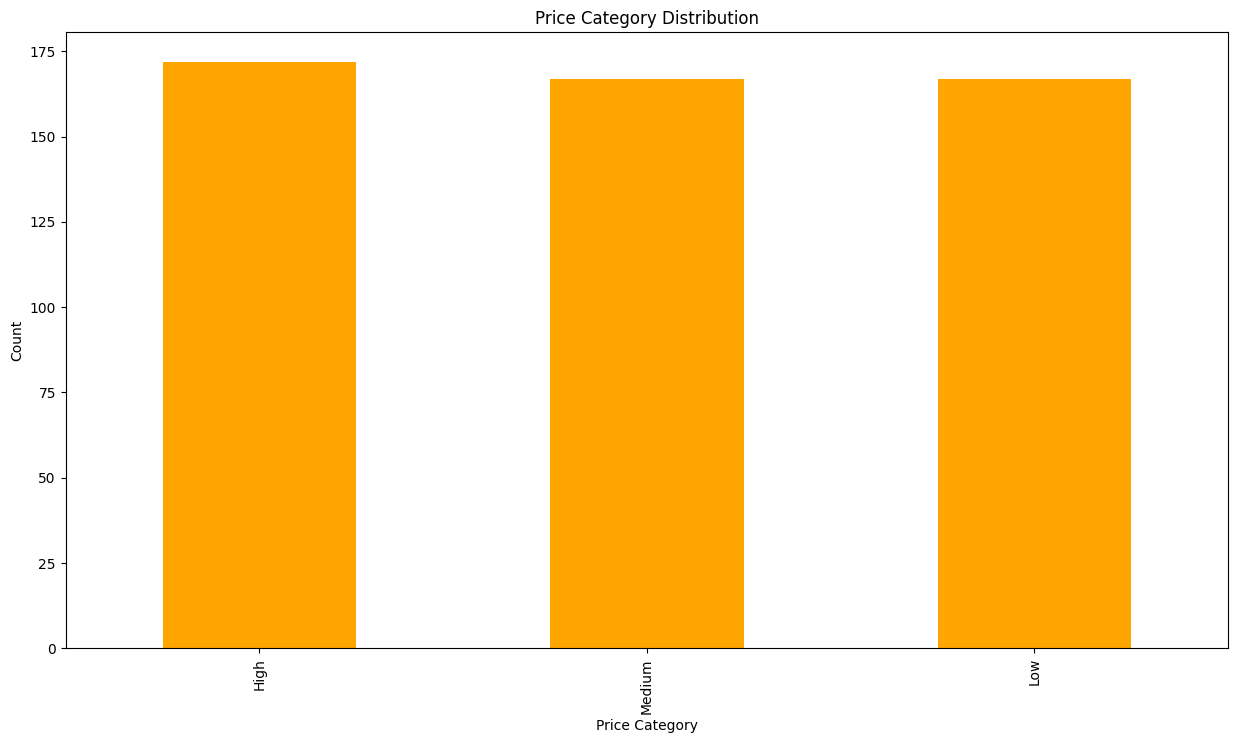

In [26]:
# Visualize the distribution
plt.figure(figsize=(15,8))
boston['PRICE_CAT'].value_counts().plot(kind='bar', color='orange')
plt.title('Price Category Distribution')
plt.xlabel('Price Category')
plt.ylabel('Count')
plt.show()

## Train Logistic Regression, Random Forest, and SVM classifiers.

In [37]:
# Prepare features and target
X = boston.drop(['MEDV', 'PRICE_CAT'], axis=1)
y = boston['PRICE_CAT']

In [38]:
from sklearn.preprocessing import LabelEncoder

# Encode labels to numerical values
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

In [39]:
# Split data (stratified to maintain class distribution)
X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded)

In [40]:
# Scale features
scaler = preprocessing.StandardScaler()
X_train_cls_scaled = scaler.fit_transform(X_train_cls)
X_test_cls_scaled = scaler.transform(X_test_cls)

In [41]:
# Initialize classifiers
classifiers = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Dicision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC()
}

## Task 04: Calculate Classification Metrics

## Compute Accuracy, Precision, Recall, F1-score for each model.

In [42]:
from sklearn.metrics import classification_report

# Train & evaluate selected classifiers
for name in classifiers:
    model = classifiers[name]
    
    # Train on scaled features (except Random Forest which can handle unscaled)
    if name ==  ['Random Forest', 'Decision Tree']:
        model.fit(X_train_cls, y_train_cls)
        y_pred_cls = model.predict(X_test_cls)
    else:
        model.fit(X_train_cls_scaled, y_train_cls)
        y_pred_cls = model.predict(X_test_cls_scaled)
    
    print(f"\n{name} Classification Report:")
    acc = accuracy_score(y_test_cls, y_pred_cls)
    print(f"{name} - Accuracy: {acc:.3f}")
    print(classification_report(y_test_cls, y_pred_cls))


Logistic Regression Classification Report:
Logistic Regression - Accuracy: 0.804
              precision    recall  f1-score   support

           0       0.80      0.80      0.80        35
           1       0.91      0.88      0.90        34
           2       0.71      0.73      0.72        33

    accuracy                           0.80       102
   macro avg       0.80      0.80      0.80       102
weighted avg       0.81      0.80      0.80       102


Dicision Tree Classification Report:
Dicision Tree - Accuracy: 0.686
              precision    recall  f1-score   support

           0       0.75      0.77      0.76        35
           1       0.69      0.74      0.71        34
           2       0.60      0.55      0.57        33

    accuracy                           0.69       102
   macro avg       0.68      0.68      0.68       102
weighted avg       0.68      0.69      0.68       102


Random Forest Classification Report:
Random Forest - Accuracy: 0.735
              pr

## Plot the Receiver-Operating Characteristics Curve (ROC) and calculate Area Under Curve (AUC) score

In [43]:
from sklearn.metrics import roc_curve, auc, RocCurveDisplay
from sklearn.preprocessing import label_binarize

# Ensure labels are properly binarized for ROC
classes = np.unique(y_test_cls)
y_test_bin = label_binarize(y_test_cls, classes=classes)
n_classes = y_test_bin.shape[1]

In [44]:
def plot_multiclass_roc(model, X_test, y_test_bin, n_classes, title):
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_test)
    elif hasattr(model, "decision_function"):
        y_score = model.decision_function(X_test)
    else:
        raise AttributeError("Model does not support probability or decision function.")

    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(8, 6))
    colors = cycle(['aqua', 'darkorange', 'cornflowerblue', 'red', 'green', 'purple'])

    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Multiclass ROC - {title}')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.show()

    return roc_auc


=== Logistic Regression ROC Curve ===


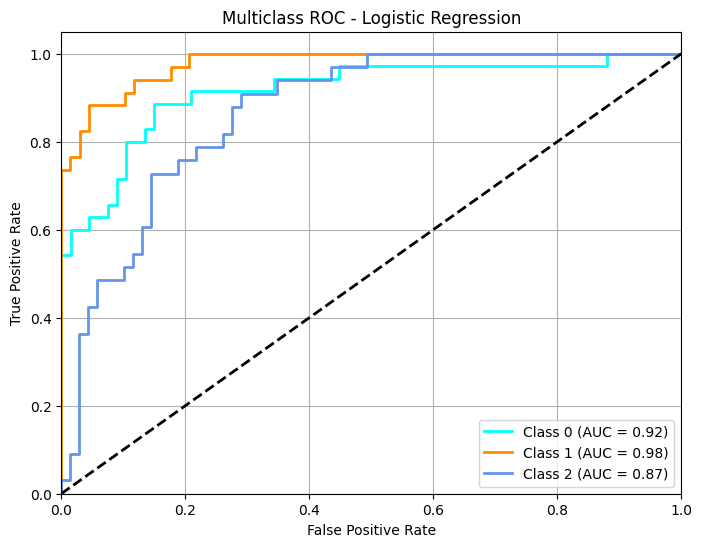


=== Dicision Tree ROC Curve ===


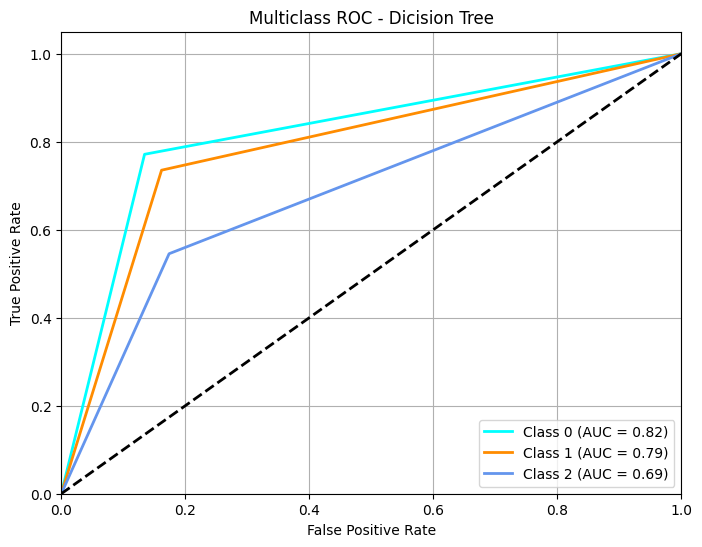


=== Random Forest ROC Curve ===


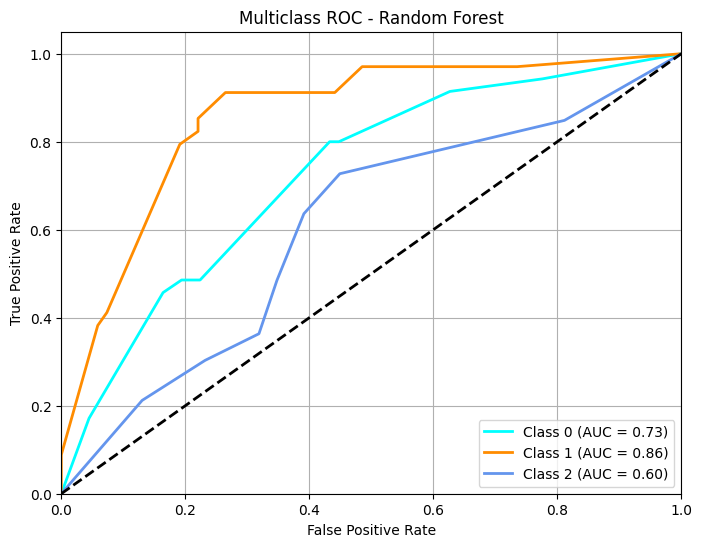


=== SVM ROC Curve ===


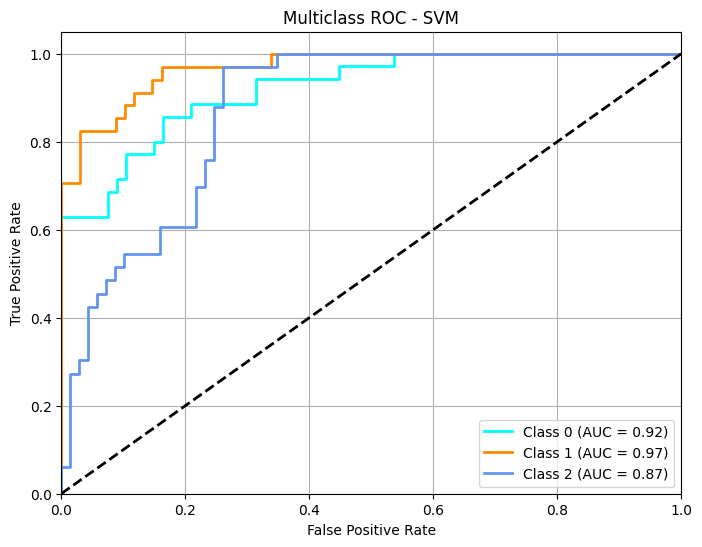

In [45]:
from itertools import cycle

for name, model in classifiers.items():
    print(f"\n=== {name} ROC Curve ===")
    if name in ['Random Forest', 'Decision Tree']:
        plot_multiclass_roc(model, X_test_cls, y_test_bin, n_classes, name)
    else:
        plot_multiclass_roc(model, X_test_cls_scaled, y_test_bin, n_classes, name)

In [46]:
# --- Store FPR, TPR, AUC for class 0 only ---
fpr_dict = {}
tpr_dict = {}
auc_dict = {}

for name, model in classifiers.items():
    print(f"\n=== Extracting Class 0 ROC for {name} ===")
    
    # Use proper input
    X_input = X_test_cls if name in ['Random Forest', 'Decision Tree'] else X_test_cls_scaled
    
    # Get probability or decision function
    if hasattr(model, "predict_proba"):
        y_score = model.predict_proba(X_input)
    elif hasattr(model, "decision_function"):
        y_score = model.decision_function(X_input)
    
    # Handle shape if decision_function returns 1D (e.g., binary SVM)
    if len(y_score.shape) == 1:
        y_score = y_score.reshape(-1, 1)

    # For binary classifiers (n_classes == 2), decision_function or predict_proba might return only 1 score
    if y_score.shape[1] != n_classes:
        # Manually broadcast if only single column is returned
        y_score = np.hstack([1 - y_score, y_score])  # assuming class 0 and 1

    # Compute ROC for class 0
    fpr, tpr, _ = roc_curve(y_test_bin[:, 0], y_score[:, 0])
    roc_auc = auc(fpr, tpr)

    fpr_dict[name] = fpr
    tpr_dict[name] = tpr
    auc_dict[name] = roc_auc


=== Extracting Class 0 ROC for Logistic Regression ===

=== Extracting Class 0 ROC for Dicision Tree ===

=== Extracting Class 0 ROC for Random Forest ===

=== Extracting Class 0 ROC for SVM ===


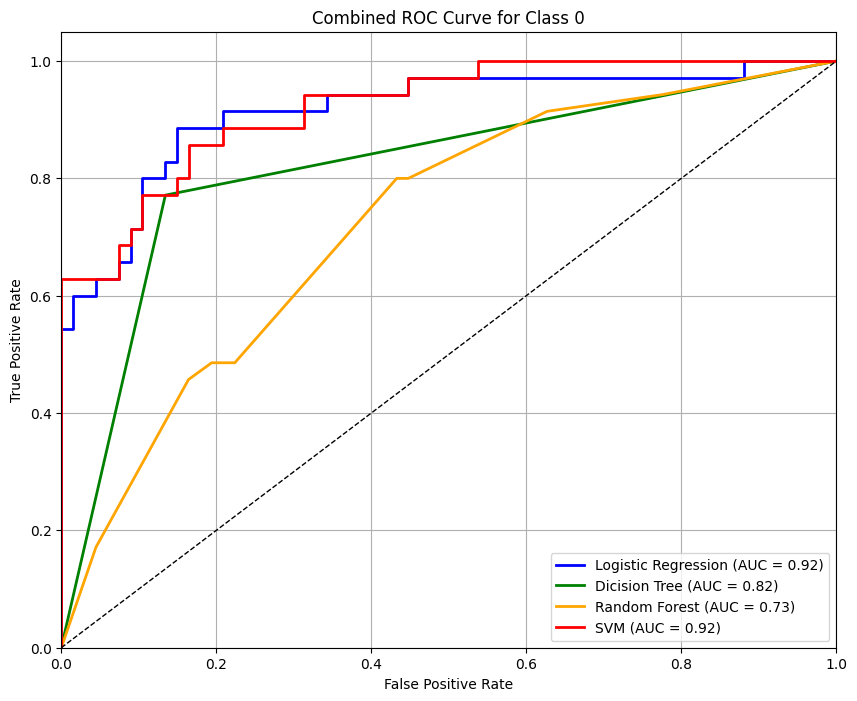

In [47]:
# --- Plot Combined Class 0 ROC Curves ---
plt.figure(figsize=(10, 8))
colors = cycle(['blue', 'green', 'orange', 'red'])

for name, color in zip(classifiers.keys(), colors):
    plt.plot(fpr_dict[name], tpr_dict[name], color=color, lw=2,
             label=f'{name} (AUC = {auc_dict[name]:.2f})')

plt.plot([0, 1], [0, 1], 'k--', lw=1)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.title("Combined ROC Curve for Class 0")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# Task 05: Apply Ensemble Learning

## Implement Bagging, Boosting (e.g. Gradient Boosting, AdaBoost, LightGBM),and Stacking to improve classification accuracy

In [48]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100, random_state=42)
bag_clf.fit(X_train_cls, y_train_cls)

BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=100,
                  random_state=42)

In [49]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf = AdaBoostClassifier(n_estimators=100, random_state=42)
ada_clf.fit(X_train_cls, y_train_cls)

AdaBoostClassifier(n_estimators=100, random_state=42)

In [51]:
from sklearn.ensemble import GradientBoostingClassifier

gb_clf = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_clf.fit(X_train_cls, y_train_cls)

GradientBoostingClassifier(random_state=42)

In [52]:
import lightgbm as lgb

lgb_clf = lgb.LGBMClassifier(n_estimators=100, random_state=42)
lgb_clf.fit(X_train_cls, y_train_cls)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003480 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1028
[LightGBM] [Info] Number of data points in the train set: 404, number of used features: 13
[LightGBM] [Info] Start training from score -1.081434
[LightGBM] [Info] Start training from score -1.111066
[LightGBM] [Info] Start training from score -1.103575
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further split

LGBMClassifier(random_state=42)

In [53]:
from sklearn.ensemble import StackingClassifier

stack_clf = StackingClassifier(
    estimators=[
        ('rf', RandomForestClassifier(random_state=42)),
        ('dt',DecisionTreeClassifier(random_state=42)),
        ('svc', SVC(probability=True, random_state=42)),
        ('logreg', LogisticRegression(max_iter=1000))
    ],
    final_estimator=GradientBoostingClassifier(),
    cv=5
)
stack_clf.fit(X_train_cls, y_train_cls)

StackingClassifier(cv=5,
                   estimators=[('rf', RandomForestClassifier(random_state=42)),
                               ('dt', DecisionTreeClassifier(random_state=42)),
                               ('svc', SVC(probability=True, random_state=42)),
                               ('logreg', LogisticRegression(max_iter=1000))],
                   final_estimator=GradientBoostingClassifier())

In [54]:
from sklearn.metrics import accuracy_score, classification_report

ensemble_models = {
    "Bagging": bag_clf,
    "AdaBoost": ada_clf,
    "Gradient Boosting": gb_clf,
    "LightGBM": lgb_clf,
    "Stacking": stack_clf
}

print("Ensemble Model Performance:\n")

for name, model in ensemble_models.items():
    y_pred_cls = model.predict(X_test_cls)
    acc = accuracy_score(y_test_cls, y_pred_cls)
    print(f"{name} - Accuracy: {acc:.3f}")
    print(classification_report(y_test_cls, y_pred_cls, target_names=label_encoder.classes_))

Ensemble Model Performance:

Bagging - Accuracy: 0.765
              precision    recall  f1-score   support

        High       0.82      0.77      0.79        35
         Low       0.83      0.88      0.86        34
      Medium       0.64      0.64      0.64        33

    accuracy                           0.76       102
   macro avg       0.76      0.76      0.76       102
weighted avg       0.76      0.76      0.76       102

AdaBoost - Accuracy: 0.735
              precision    recall  f1-score   support

        High       0.96      0.71      0.82        35
         Low       0.71      0.85      0.77        34
      Medium       0.60      0.64      0.62        33

    accuracy                           0.74       102
   macro avg       0.76      0.73      0.74       102
weighted avg       0.76      0.74      0.74       102

Gradient Boosting - Accuracy: 0.735
              precision    recall  f1-score   support

        High       0.78      0.80      0.79        35
         Lo

## Identify the most important features using feature importance scores.

In [55]:
feature_names = X_train_cls.columns.tolist()
feature_names

['CRIM',
 'ZN',
 'INDUS',
 'CHAS',
 'NOX',
 'RM',
 'AGE',
 'DIS',
 'RAD',
 'TAX',
 'PTRATIO',
 'B',
 'LSTAT']

In [56]:
def plot_feature_importances(model, feature_names, title):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10, 6))
    plt.title(title)
    plt.bar(range(len(importances)), importances[indices], color="skyblue", align="center")
    plt.xticks(range(len(importances)), [feature_names[i] for i in indices], rotation=45, ha='right')
    plt.ylabel("Feature Importance Score")
    plt.tight_layout()
    plt.grid(True)
    plt.show()

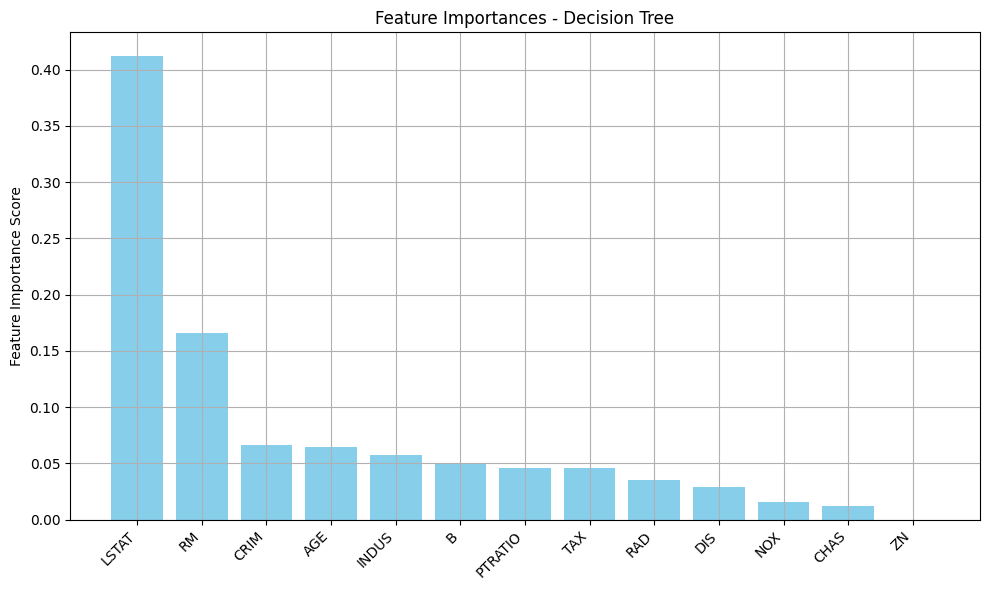

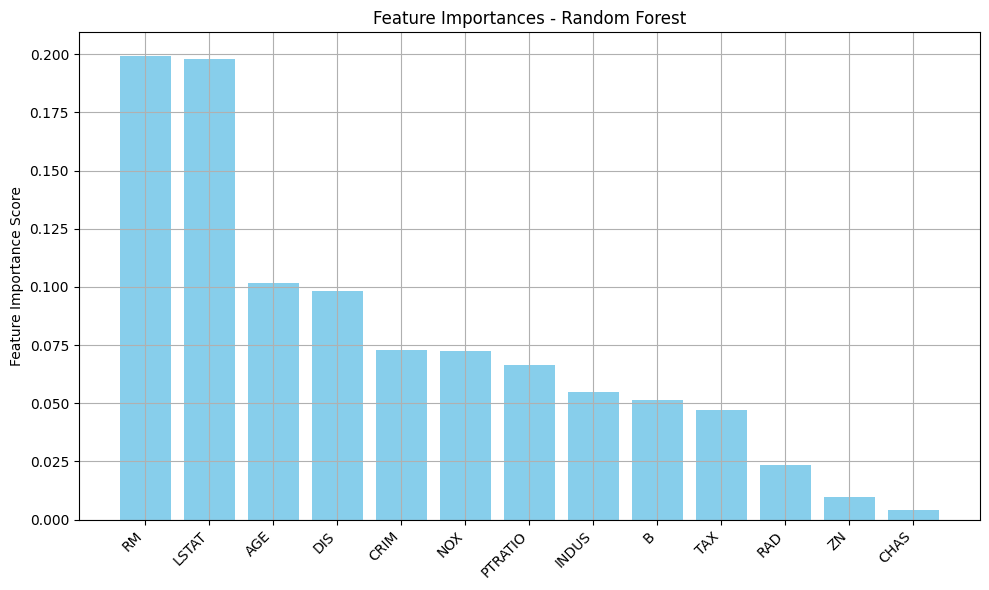

In [57]:
# Access the trained models
dt_model = classifiers['Dicision Tree']
rf_model = classifiers['Random Forest']

# Plot
plot_feature_importances(dt_model, feature_names, "Feature Importances - Decision Tree")
plot_feature_importances(rf_model, feature_names, "Feature Importances - Random Forest")

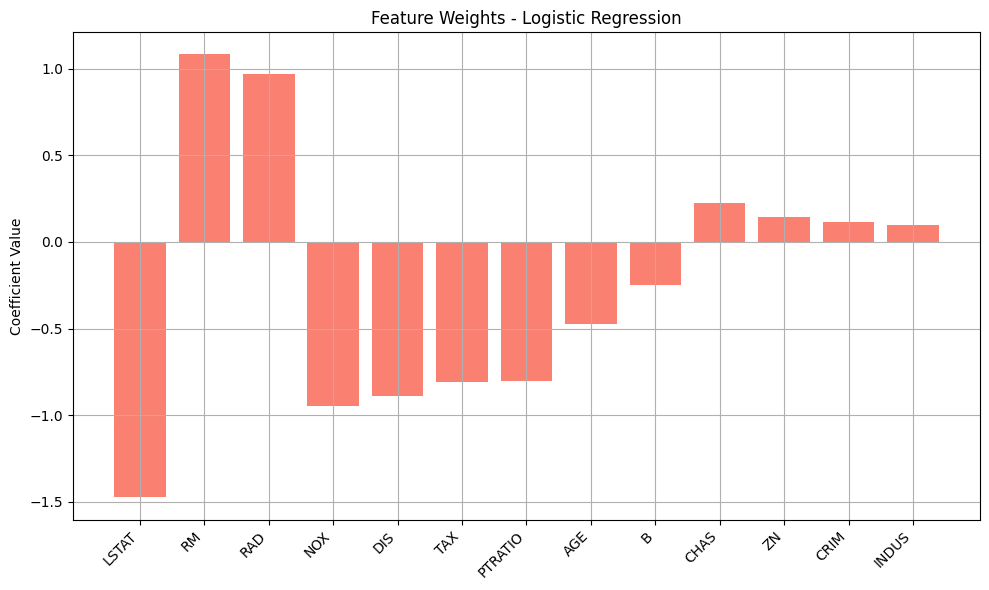

In [58]:
lr_model = classifiers['Logistic Regression']
coefs = lr_model.coef_[0]  # For binary classification

# Plot
plt.figure(figsize=(10, 6))
indices = np.argsort(np.abs(coefs))[::-1]
plt.title("Feature Weights - Logistic Regression")
plt.bar(range(len(coefs)), coefs[indices], color="salmon", align="center")
plt.xticks(range(len(coefs)), [feature_names[i] for i in indices], rotation=45, ha='right')
plt.ylabel("Coefficient Value")
plt.grid(True)
plt.tight_layout()
plt.show()

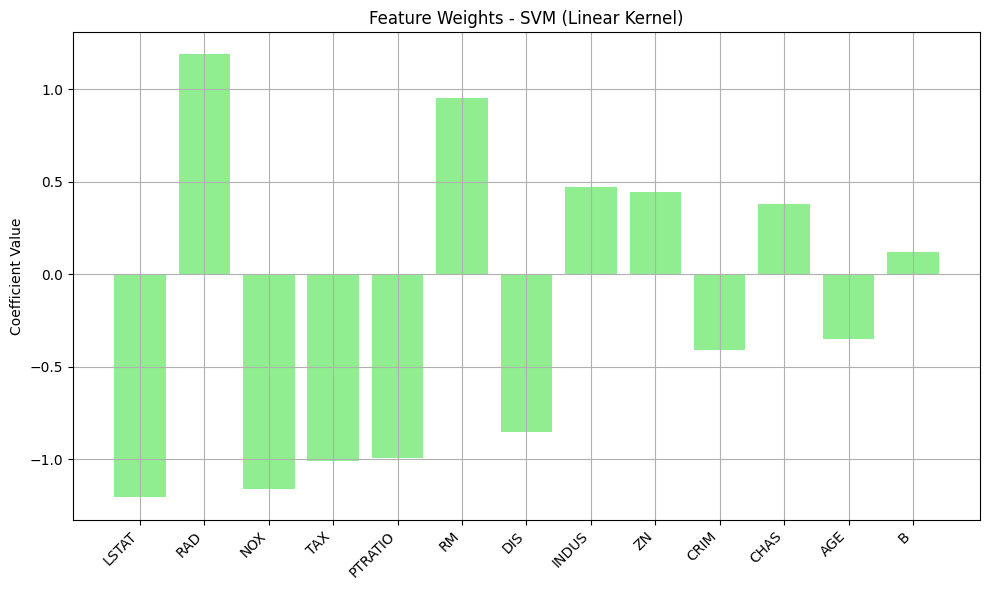

In [60]:
# SVC with linear kernel
svm_linear = SVC(kernel='linear')
svm_linear.fit(X_train_cls_scaled, y_train_cls)
coefs = svm_linear.coef_[0]  # For binary classification

# Plot
plt.figure(figsize=(10, 6))
indices = np.argsort(np.abs(coefs))[::-1]
plt.title("Feature Weights - SVM (Linear Kernel)")
plt.bar(range(len(coefs)), coefs[indices], color="lightgreen", align="center")
plt.xticks(range(len(coefs)), [feature_names[i] for i in indices], rotation=45, ha='right')
plt.ylabel("Coefficient Value")
plt.grid(True)
plt.tight_layout()
plt.show()

# Task 06: Insights & Conclusion

## Analyze and compare model performance for both regression and classification.

In [61]:
regression_results = {}

# Example: Evaluate a few regression models
for name, model in models.items():
    y_pred = model.predict(X_test_scaled)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    regression_results[name] = {"MSE": mse, "R2": r2}

# Display nicely
reg_df = pd.DataFrame(regression_results).T
reg_df

,MSE,R2
Linear Regression,24.291119,0.668759
Decision Tree,10.416078,0.857963
Random Forest,7.912745,0.892100
Support Vector Machine,25.668540,0.649977


In [62]:
classification_results={}

# Train & evaluate selected classifiers
for name in classifiers:
    model = classifiers[name]
    
    # Train on scaled features (except Random Forest which can handle unscaled)
    if name ==  ['Random Forest', 'Decision Tree']:
        model.fit(X_train_cls, y_train_cls)
        y_pred_cls = model.predict(X_test_cls)
    else:
        model.fit(X_train_cls_scaled, y_train_cls)
        y_pred_cls = model.predict(X_test_cls_scaled)
    
    print(f"\n{name} Classification Report:")
    acc = accuracy_score(y_test_cls, y_pred_cls)
    classification_results[name] = {
        "Accuracy": acc,
    }


# Display classification results
cls_df = pd.DataFrame(classification_results).T
cls_df


Logistic Regression Classification Report:

Dicision Tree Classification Report:

Random Forest Classification Report:

SVM Classification Report:


,Accuracy
Logistic Regression,0.803922
Dicision Tree,0.686275
Random Forest,0.735294
SVM,0.725490


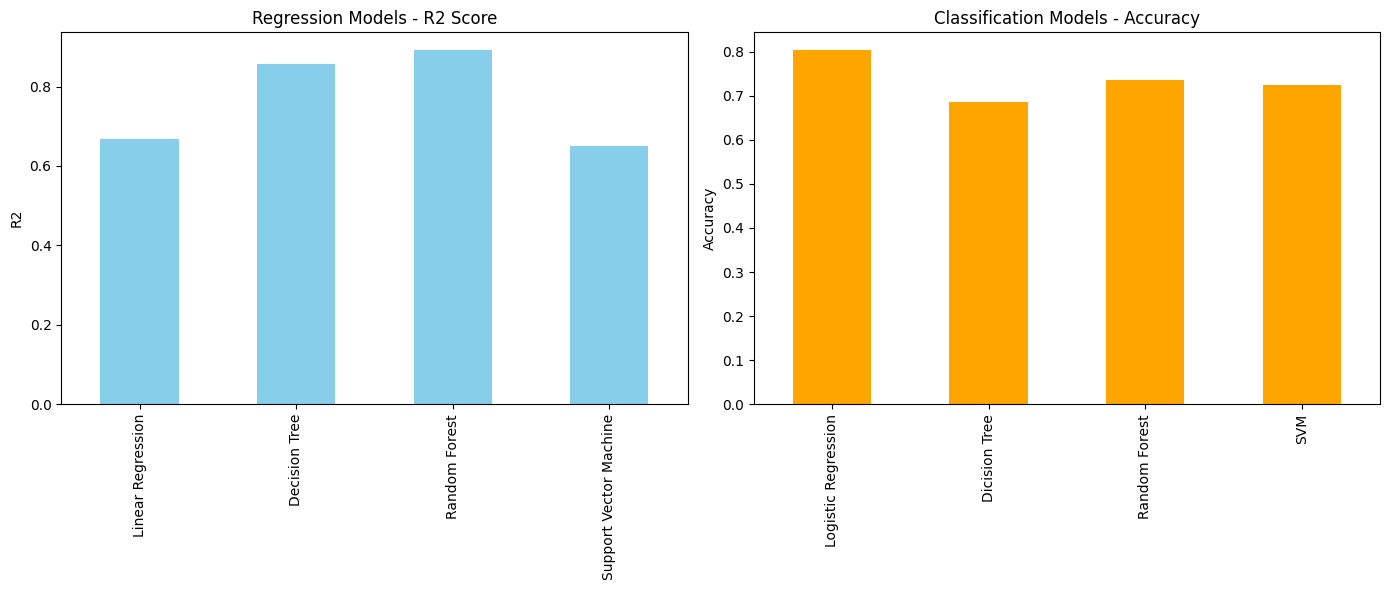

In [63]:
# Compare both Regression and Classification Models Side-by-Side
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

# Regression Comparison (R2 Score)
reg_df['R2'].plot(kind='bar', ax=axs[0], color='skyblue')
axs[0].set_title('Regression Models - R2 Score')
axs[0].set_ylabel('R2')

# Classification Comparison (Accuracy)
cls_df['Accuracy'].plot(kind='bar', ax=axs[1], color='orange')
axs[1].set_title('Classification Models - Accuracy')
axs[1].set_ylabel('Accuracy')

plt.tight_layout()
plt.show()

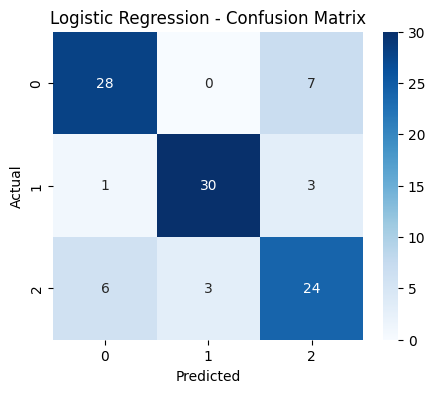

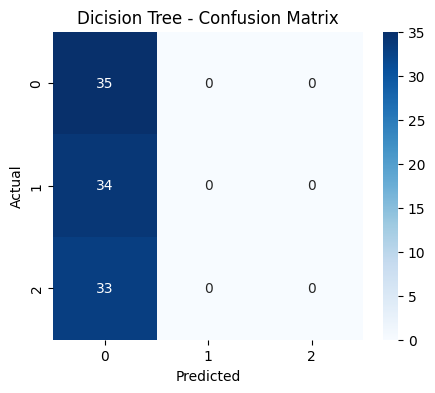

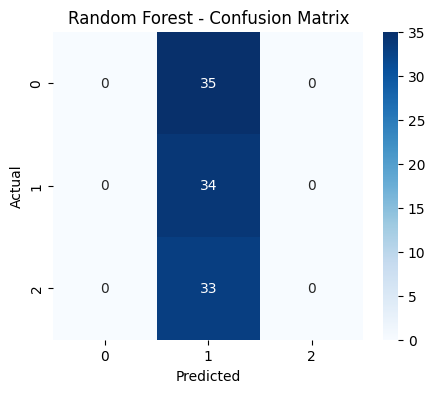

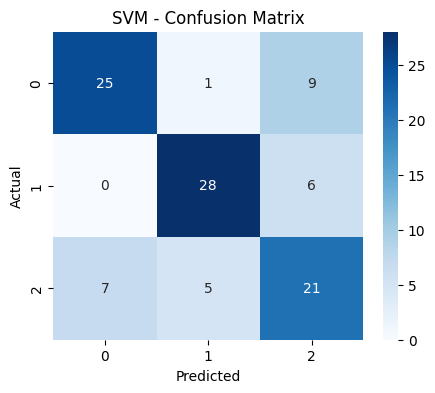

In [65]:
from sklearn.metrics import confusion_matrix

for name, model in classifiers.items():
    if name == "Random Forest" or name == "Dicision Tree":
        y_pred = model.predict(X_test_cls)
    else:
        y_pred = model.predict(X_test_cls_scaled)

    cm = confusion_matrix(y_test_cls, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"{name} - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

## Summarize key takeaways in each of the five steps, including importance and limitations.


### Step-1: Data Preprocessing & EDA 

**Takeaways:**
* Dataset loaded from an external source due to ethical concerns (racially sensitive feature).
* No missing values; already mostly preprocessed.
* Small dataset (506 rows, 14 features) — limits model generalizability.
* CHAS and RAD are categorical but stored numerically; no one-hot encoding needed.
* Significant outliers in CRIM, ZN, and B — not removed due to dataset size.
* StandardScaler used for feature scaling to handle feature variance while retaining outliers.

**Limitations:** Small size, ethical concerns, and presence of outliers.</br>
**Importance:** Clean and simple dataset for learning regression basics.

### Step-2: Train & Evaluate Regression Models

**Takeaways:**
* **Without CV:**
  * **Best:** Random Forest (R²: 0.89)
  * **Worst:** SVM & Linear Regression (R² ≈ 0.65)

* **With GridSearchCV:**
  * Random Forest stayed best.
  * SVM improved (R²: 0.83)
  * Decision Tree overfit (R²: 0.73)

* **With RandomizedSearchCV:**
  * All models improved.
  * Decision Tree (R²: 0.86), Random Forest (R²: 0.86), SVM (R²: 0.83)

**Importance:** Random Forest is the most consistent. Hyperparameter tuning boosts performance.

**Limitation:** Small dataset, risk of overfitting, no CV tuning for Linear Regression.

### Step-3: Convert Regression to Classification

* **Takeaways**
* **Target Conversion:**
  * Used **quantiles** to categorize prices into **Low**, **Medium**, and **High**.
  * Applied **LabelEncoder** to map labels numerically.

* **Preprocessing:** Features scaled using **StandardScaler**.

* **Model Training:**

  * Trained **4 classifiers**: Logistic Regression, Decision Tree, Random Forest, and SVM.

**Importance:** Regression labels successfully transformed into classes for classification tasks.

**Limitation:** Quantile-based binning may cause class imbalance; label boundaries are arbitrary.


 ### Step-4: Classification Metrics

 * Takeaways

* **Best Overall Performance:**
  * **Logistic Regression** achieved highest accuracy (**80.4%**) and strong precision/recall across all classes.

* **Model Comparison (Accuracy):**
  * Logistic Regression: **0.804**
  * Random Forest: **0.735**
  * SVM: **0.725**
  * Decision Tree: **0.686**

* **ROC-AUC (per class):**
  * **Logistic Regression:** 0.92 (Low), 0.98 (Medium), 0.87 (High)
  * **SVM:** 0.92, 0.97, 0.87 (very close to Logistic)
  * Others showed lower scores, especially in class 2

**Importance:** Logistic Regression performed best in classification accuracy and ROC-AUC. SVM was a close second.

**Limitation:** Class 2 ("High") consistently had lower precision and recall across models.


### Step-5: Ensemble Learning & Feature Importance

**Takeaways**

* **Ensemble Model Performance (Accuracy):** Bagging has the Highest accuracy, Strong f1-scores for High and Low, Performs most consistently across all classes.
* **Decision Tree:**
  * Top feature: **LSTAT**
  * Top 5: LSTAT, RM, CRIM, AGE, INDUS, B

* **Random Forest:**
  * Top features: **RM**, **LSTAT**
  * Others: AGE, DIS, CRIM

* **SVM Feature Weights:**
  * **Positive Impact:** RAD, RM, ZN, INDUS, CHAS
  * **Negative Impact:** All other features

**Importance**
* **RM** and **LSTAT** consistently emerged as the most important features.
* **RAD** shows a strong positive influence in linear models (SVM, Logistic).
* Ensemble methods (Random Forest, Decision Tree) provide stable and interpretable feature rankings.

**Limitation:**
* Feature importance varies by model type.
* SVM weights can be harder to interpret due to scaling.